<a href="https://colab.research.google.com/github/moch1996/Vaycold/blob/main/Python_DL/%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%B6%84%EB%A5%98-RNN%EC%9C%BC%EB%A1%9C%20%EC%86%90%EA%B8%80%EC%94%A8%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST 데이터셋 사용

## 라이브러리

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Image

warnings.filterwarnings('ignore')

SEED = 34

## 도입 전 기본 처리

In [ ]:
# MNIST 데이터 살펴보기

In [ ]:
mnist = keras.datasets.mnist
# 튜플로 train과 test 셋 나눠서 가져오자
((train_images, train_labels),(test_images, test_labels))= mnist.load_data()

In [ ]:
# 데이터 shape 확인

print('train_image : ',train_images.shape)
print('train_labels : ',train_labels.shape)
print('')
print('test_image : ',test_images.shape)
print('test_labels : ',test_labels.shape)

train_image :  (60000, 28, 28)
train_labels :  (60000,)

test_image :  (10000, 28, 28)
test_labels :  (10000,)


In [ ]:
# 28 x 28 형태의 이미지를 plt를 이용해서 출력해보자

train_images.shape

(60000, 28, 28)

In [ ]:
train_images[0].shape

(28, 28)

In [ ]:
train_images[-1].shape

# 6만장 중 하나를 떼오는 것임

(28, 28)

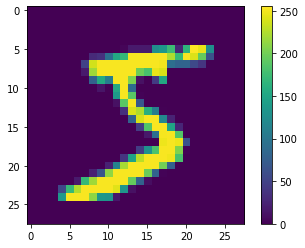

5


In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

print(train_labels[0])

In [ ]:
# train_ images에서 0이 아닌 값들을 출력해보자.
# 0번째 데이터셋은 값이 0부터 255까지 있는데 어떤 데이터는 그렇지 않으면 스케일링이 필요할 수 있음
# 그렇기 때문에 0이 아닌것들을 지워서 확인하려는 것
# 우선 28 x 28을 1차원으로 바꾸자

train_images[0].reshape(-1)

In [25]:
# 이 1차원 벡터에 filter 함수를 적용시키자
# filter함수는 들어있는 함수가 참이여야만 값을 반환해주는 함수이다.
list(filter( lambda x : x!=0, train_images[0].reshape(-1)))[:10]

# 대충 255가 제일 큰것 같군 

[3, 18, 18, 18, 126, 136, 175, 26, 166, 255]

In [ ]:
sorted(list(filter( lambda x : x!=0, train_images[0].reshape(-1))))

In [28]:
# train_images의 datatype을 보자
print(train_images.dtype)

dtype('uint8')

## 전처리

In [32]:
# train / test 이미지 최소, 최대값을 출력

print(max(train_images.reshape(-1)), min(train_images.reshape(-1)))
print(max(test_images.reshape(-1)), min(test_images.reshape(-1)))

# 데이터에 이상은 없넹

255 0
255 0


In [33]:
# 정수형을 실수형으로 변경한 후 dtype으로 비교

test_images.astype(np.float64).dtype

dtype('float64')

In [34]:
test_images = test_images.astype(np.float64)
train_images = train_images.astype(np.float64)

In [35]:
# 데이터를 0~1 정규화를 수행하자
# 0에서 1사이의 값을 가지게 하기 위한 작업

max((train_images / 255).reshape(-1) )


1.0

In [36]:
train_images = train_images / 255
test_images = test_images / 255

## 시각화

In [46]:
# train_image의 이미지 5장을 획득하여 (5,28,28)의 shape을 보자

train_images[:5].shape

(5, 28, 28)

In [48]:
# 위의 5장 이미지를 (28, 28*5)의 shape으로 변경해보자
# 왜냐하면 5장의 이미지를 출력해보고 싶기 때문에!
train_images[:5].reshape(28,-1) # 이걸 plt로 보면 어떻게 나올까

(28, 140)

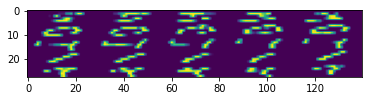

In [50]:
plt.imshow(train_images[:5].reshape(28,-1))
plt.show()

#뭔진 몰라도 굉장히 이상하다

In [53]:
# hstack 기법을 사용하자
np.hstack(train_images[:5]).shape

# 같은 shape임


(28, 140)

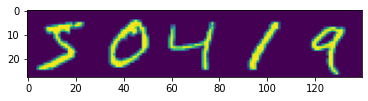

In [56]:
# plotting을 해보자
plt.imshow(np.hstack(train_images[:5]))
plt.show()

In [59]:
# transpose 함수를 이용하여 shape를 변경해보자
train_images[:5].shape
# (5, 28, 28) 이 의미하는 것이 5는 배치축(0번째 축), 28은 height축(1번째 축), 마지막 28은 width축(2번째축)을 의미함 

(5, 28, 28)

In [60]:
train_images[:5].transpose((1,0,2)).reshape(28,-1).shape #height축, 배치축, width축으로 할거다. 라는 것을 의미

(28, 140)

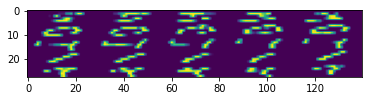

In [61]:
# 그렇다면 plt로 확인해보자

plt.imshow(train_images[:5].reshape(28,-1))
plt.show()

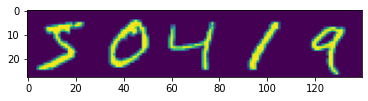

In [62]:
plt.imshow(np.hstack(train_images[:5]))
plt.show()

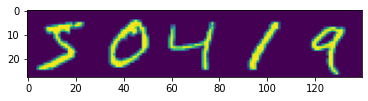

In [63]:
plt.imshow(train_images[:5].transpose((1,0,2)).reshape(28,-1))
plt.show()

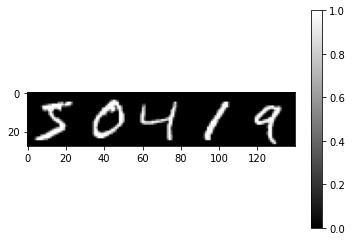


[5 0 4 1 9]


In [68]:
# 28 x 140이 된 텐서를 흑백으로 표현해보자

plt.imshow(train_images[:5].transpose((1,0,2)).reshape(28,-1),cmap='gray')
plt.colorbar()
plt.show()
print('')
print(train_labels[:5])

## Data Augmentation - noise 추가방법
 - 원본은 유지하되 데이터를 살짝 바꾸는 방법

In [69]:
# np.random.random 함수를 이용해보자

np.random.random(3)

array([0.9031083 , 0.71901596, 0.22702234])

In [72]:
# 위 함수를 이용하여  shape 파라미터를 (28, 28)의 랜덤 노이즈를 생성해보자
noise = np.random.random((28,28))

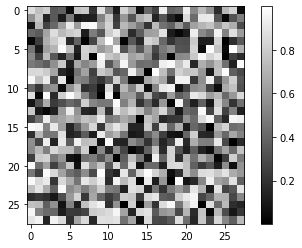

In [81]:
# 생성된 노이즈를 plt를 통해 확인해보자
noise = np.random.random((28,28))
plt.imshow(noise, cmap='gray')
plt.colorbar()
plt.show()

In [86]:
# 이번에는 가우시안 노이즈 함수를 사용하여 평균 0 , 표준편차0.1, 사이즈 1로 랜덤값을 3번 출력해보자
print(np.random.normal(0,0.1,1))
print(np.random.normal(0,0.1,1))
print(np.random.normal(0,0.1,1))

[-0.088334]
[-0.05474505]
[-0.19930083]


In [87]:
# 이번에는 가우시안 노이즈 함수 평균 3, 표준편차 0.03, 사이즈 1로 출력해보자

print(np.random.normal(0,0.1,1))
print(np.random.normal(0,0.1,1))
print(np.random.normal(0,0.1,1))

print('')

print(np.random.normal(3,0.01,1))
print(np.random.normal(3,0.01,1))
print(np.random.normal(3,0.01,1))

[0.0428846]
[0.21741255]
[0.029658]

[2.99774203]
[3.00969259]
[2.98633736]


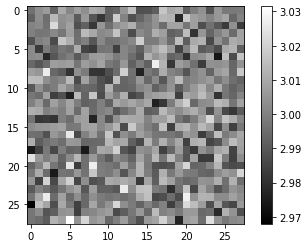

In [89]:
# 출력해보자

noise2 = np.random.normal(3,0.01,(28,28))  #뒤에 사이즈에다가 28x28을 해주면 됨
plt.imshow(noise2, cmap='gray')
plt.colorbar()
plt.show()


In [92]:
# Train_images의 5번째 이미지와 가우시안 노이즈를 생성한 뒤 각각 tensor에 더한 뒤 noisy_image변수에 할당해보자
train_labels[5]

2

In [93]:
(train_labels[5] + np.random.normal(0.0, 0.01, (28,28))).shape

(28, 28)

In [116]:
noisy_image = train_images[5] + np.random.normal(0.5, 0.1, (28,28))

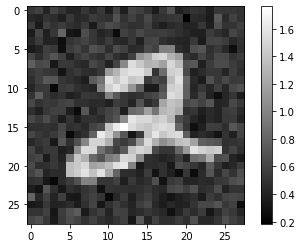

In [117]:
# 노이즈 이미지 출력
plt.imshow(noisy_image, cmap='gray')
plt.colorbar()
plt.show()

# 1을 초과하는 것을 볼 수 있음.


In [119]:
# 노이즈 이미지의 맥스값을 1로 설정해주자
# 맥스값이 1을 초과하지 않게 noisy_image 를 수정한 뒤 plt로 출력해보자

noisy_image[noisy_image > 1] = 1.0

In [125]:
noisy_image[10:11]

array([[0.42245202, 0.53493944, 0.54577779, 0.22709373, 0.54218507,
        0.57451651, 0.48788819, 0.44351421, 0.4066249 , 0.99313402,
        1.        , 1.        , 1.        , 1.        , 0.77078814,
        0.35190956, 0.34618694, 0.68022635, 1.        , 1.        ,
        0.77948558, 0.423902  , 0.54004397, 0.41952818, 0.57975967,
        0.42680581, 0.62396065, 0.68375499]])

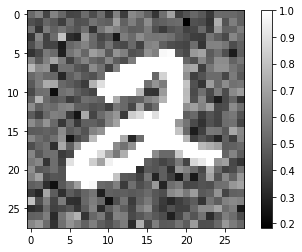

In [126]:
plt.imshow(noisy_image, cmap='gray')
plt.colorbar()
plt.show()

In [127]:
# 이제 트레인 이미지와 테스트 이미지에 노이즈를 추가해보자

train_images.shape

(60000, 28, 28)

In [128]:
train_noisy_images = train_images + np.random.normal(0.5, 0.1, train_images.shape)
train_noisy_images[train_noisy_images > 1.0] = 1.0

test_noisy_images = test_images + np.random.normal(0.5, 0.1, test_images.shape)
test_noisy_images[test_noisy_images > 1.0] = 1.0


In [130]:
# label에 one-hot 인코딩을 적용하여 (배치사이즈, 클래스 개수)의 shape으로 변경해보자.
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [131]:
train_labels[0]

5

In [132]:
from keras.utils import to_categorical

to_categorical(train_labels[0])

array([0., 0., 0., 0., 0., 1.], dtype=float32)

In [134]:
to_categorical(4), to_categorical(2) # 이렇게하면 텐서 갯수가 왔따리 갔다리 하지만 이걸 고정해줄 수 있음.

(array([0., 0., 0., 0., 1.], dtype=float32),
 array([0., 0., 1.], dtype=float32))

In [135]:
to_categorical(2,10) #고정완료

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [138]:
print(train_labels.shape, test_labels.shape)
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)
print(train_labels.shape, test_labels.shape)

(60000,) (10000,)
(60000, 10) (10000, 10)
